# Advertising Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
dataset = pd.read_csv("Assignment 2 Advertising.csv", index_col=0)
dataset.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Exploratory Data Analysis

In [3]:
dataset.shape

(200, 4)

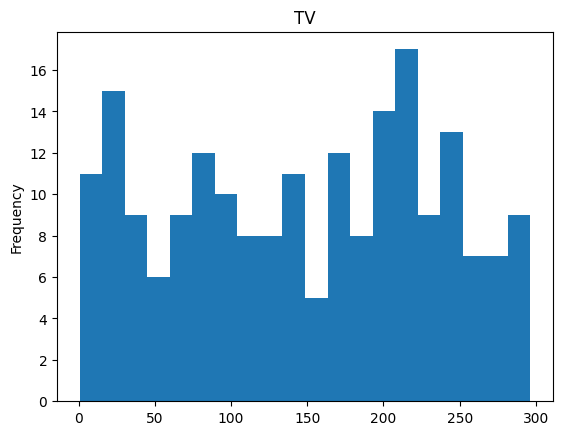

In [4]:
# TV Histogram
from matplotlib import pyplot as plt
dataset['TV'].plot(kind='hist', bins=20, title='TV')
plt.show()

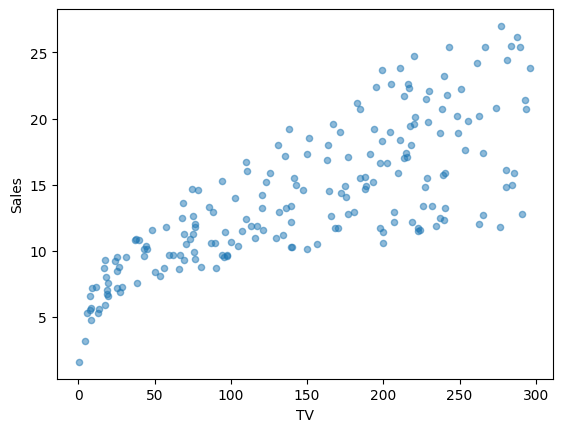

In [5]:
# TV vs Sales
from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='TV', y='Sales', alpha=0.5)
plt.show()

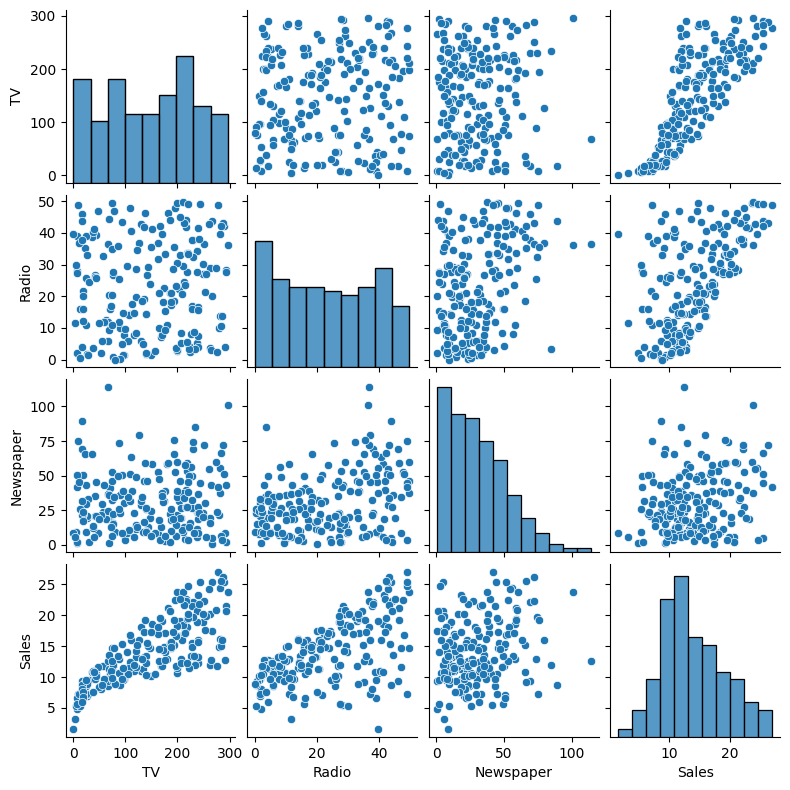

In [6]:
sns.pairplot(data=dataset, height=2)

## Variance Inflation Factor

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return (vif)


In [8]:
X = dataset.iloc[:, :-1]
calc_vif(X)

,VIF
0,2.486772
1,3.285462
2,3.055245


## Setting Variables

In [9]:
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [10]:
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
x.shape

(200, 3)

In [12]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [13]:
y.shape

(200,)

## Splitting into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Implementing the model

In [15]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

## Model Equation

In [16]:
# Slope And Intercept

print("Estmated model slope:", mlr.coef_)
print("Estmated model intercept:", mlr.intercept_)
list(zip(x, mlr.coef_))

Estmated model slope: [0.04472952 0.18919505 0.00276111]
Estmated model intercept: 2.979067338122629


[('TV', 0.044729517468716326),
 ('Radio', 0.18919505423437652),
 ('Newspaper', 0.0027611143413671935)]

## Model Prediction

In [17]:
y_pred = mlr.predict(x_test)

In [18]:
mlr_diff = pd.DataFrame({'Actual value':y_test,'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
96,16.9,16.408024
16,22.4,20.889882
31,21.4,21.553843
159,7.3,10.608503
129,24.7,22.112373


## Model Evaluation

In [19]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = metrics.root_mean_squared_error(y_test, y_pred)
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Squared Error:', meanSqErr)
print('Root Mean Squared Error:', rootMeanSqErr)


R squared: 89.67
Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
Root Mean Squared Error: 1.78159966153345


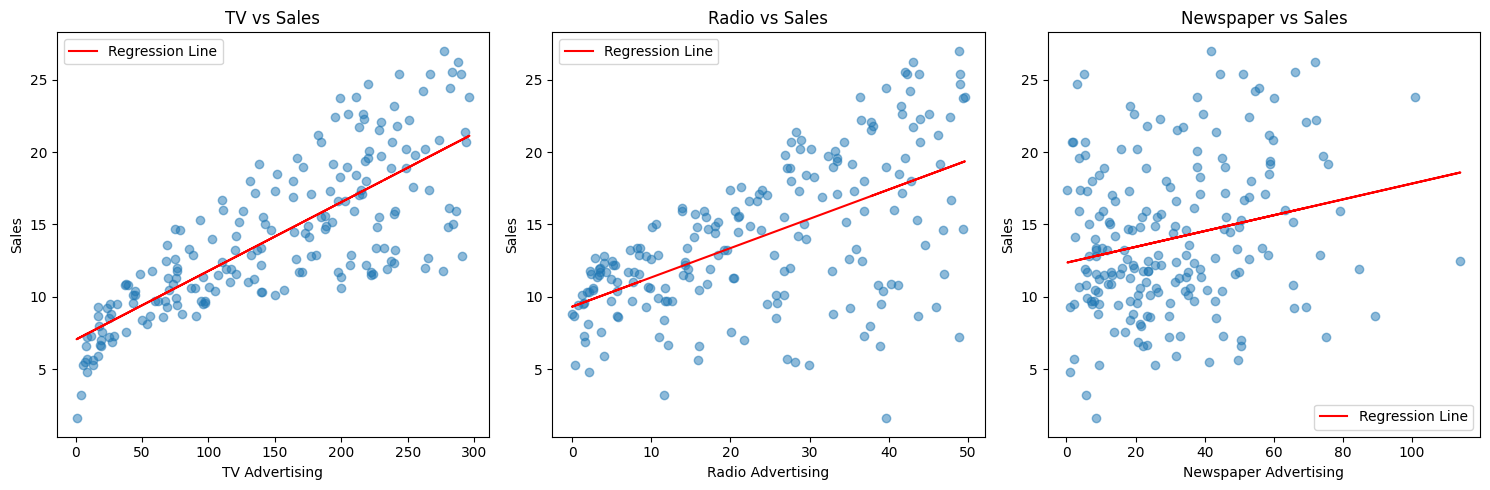

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def plot_scatter_with_regression(ax, x_data, y_data, x_label, title):
    ax.scatter(x_data, y_data, alpha=0.5)
    
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regression_line = slope * x_data + intercept
    
    ax.plot(x_data, regression_line, color='red', label='Regression Line')
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Sales')
    ax.legend()
    
plot_scatter_with_regression(axes[0], dataset['TV'], dataset['Sales'], 'TV Advertising', 'TV vs Sales')

plot_scatter_with_regression(axes[1], dataset['Radio'], dataset['Sales'], 'Radio Advertising', 'Radio vs Sales')

plot_scatter_with_regression(axes[2], dataset['Newspaper'], dataset['Sales'], 'Newspaper Advertising', 'Newspaper vs Sales')

plt.tight_layout()
plt.show()